# 개요

- 포지션
  - AI = 머신러닝 > 지도학습 > 분류
    - 분류 알고리즘의 성능을 평가하는 기준
- 방볍
  - 혼동 행렬(오차 행렬)
  - 예측값이 실제 관측값(정답)에 비해 얼마나 정확한가?

# 혼동행렬(오차행렬)

- 구성 요소 
  - 총 조합은(2+2) 4가지 경우가 발생

  - Positive : P : 긍정
  - Negative : N : 부정
---
- True : T : 긍정 부정 상관없이 일치하면 T
- False : F : 긍정 부정 상관없이 불일치하면 F



- case
  - 전체 : 명제에 대한 실제 상황이 긍정적일수도 있고 아닐 수도 있다
  - A라는 사람이 병원에 방문하였다 암을 진단하였다
  - 암이 있다고 예측하고 진단했는데 실제로 암이 있었다
    - (TP, TN, FP, FN) 이것들 중 어떤 것에 해당되는가?

- TP
  - 암이 있다고 예측, 실제로 암이 있었다
- TN
  - 암이 없다고 예측, 실제로 암이 없었다
- FP
  - 암이 있다고 예측, 실제로 암이 없었다
- FN
  - 암이 없다고 예측, 실제로 암이 있었다


- 평가 지표
  - 기본 요소 (TP, ...)를 이용해서 구성
  - metrics.classification_report()를 통해서 확인해 봄
- 정확도
  - accuracy
  - (예측값과 실제값이 일치한 건 수) / (예측을 수행한 총 횟수)
  - (TP + TN) / (TP + TN + FP + FN)
  - 모델이 입력된 데이터에 대해서 얼마나 정확하게 예측하는지 나타낸다(훈련시 나오는 지표)



- 정밀도
 - precision
 - 암이 **있다**고 예측한 모든 상황에서 실제로 암이 있었다
 - P = TP / (TP + FP)
 - "예 or yes or 긍정"라고 예측했을 때의 정답율

- 재현율
  - recall
  - 실제 암이 있는 전체 데이터(TP + FN), 참긍정비율(TP)
  - 실제로 병이 있는 전체 데이터 중 참긍정비율
  - 실제 암환자가 병원에 내원해서 실제로 암환자라고 예측될 확률
  - 병을 조기에 진단 발견해서 신속하게 처방/조치 받을 떼 적절하게 활용될 수 있는 지표
  - R = TP / (TP +FN)

- F1-score
  - 정밀도, 재현율 이 중에 어떤 것을 써야 할 지 애매모호한 경우 
  - 두 값의 조합확률을 구해서 수치로 나타낸 지표
  - 정밀도(P)와 재현율(R)의 조화평균
  - 조화평균
    - 평균적인 변화율을 가진 정확한 평균치
    -  VS 산출평균(s1 + s2 + ...)/ 총 개수
  - F1 = 2 * (P * R) / (P + R)


- 특이성
  - 실제 암이 없는 데이터 중(TN + FN) 대비 참부정 비율(TN)
  - TN / (TN + FN)
- 곡선하면적(ROC 커브, AUC 값)
  - 여러 알고리즘을 **시각화** 해서 어떤 알고리즘이 성능이 좋은지 판단하는 지표
  - 최종 선택을 할 때, 여러 알고리즘 값들이 겹쳐서 구분이 쉽지 않을 수 있다 -> AUC값 활용하여 서열 정리 가능
- 다항시
  - 마이크로 평균
    - ex) 정밀도
      - P = (TP1 + TP2 + TP3 + ...) / (TP1 + FP1 + TP2 + FP2 + ...)
  - 매크로 평균
    - ex) 정밀도
      - P = (P1 + P2 + P3 + ....) / 총개수

# 간단한 데이터를 이용하여 성능평가 진행 

## 연구 목표 설정

- 머신러닝 > 지도학습 > 분류 > 모델 생성 절차 중 성능평가 테스트
- ROC, AUC 시각화

## 데이터 수집/획득

- scikit-learn 에서 제공하는 학습용 데이터 활용
  - 관련함수
    - fetch_xxxx()
      - 데이터가 크다, 요청 시 다운로드 후 제공 
    - load_xxxx()
      - 패키지 설치시 바로 제공
    - make_xxxx()
      - 더미(임시) 데이터, 가짜 데이터를 임의로 생성해서 제공

In [ ]:
# 라이브러리 불러오기
import sklearn.datasets as mls
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [ ]:
# 데이터 불러오기
tmp = mls.load_iris()
print(tmp.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 데이터 준비/전처리

In [ ]:
# 기본적인 데이터 참색(확인)
# 데이터 전처리 혹은 준비

In [ ]:
tmp.target
# 3개의 클래스를 순서대로 0,1,2로 세팅되어 있다
# 데이터가 동일 종류끼리 붙어서 배치되어 있다 
# 나중에 훈련시 데이터를 섞어서 처리해야 겠다
# 정답이 모두 수치로 되어 있다

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
tmp.target_names
# 정답의 이름 확인

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 데이터(종속변수) 볼륨, 크기, 사이즈 확인 등등
tmp.target.shape

(150,)

In [ ]:
# 독립변수 데이터 체크
tmp.data.shape
# 컬럼(특성)이 4개, 데이터는 총 15개 존재

(150, 4)

In [ ]:
# 데이터는 어떻게 생겼는가?
tmp.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# 데이터프레임 구성
# (150,4)
# 컬럼명은 실제 이름을 사용
# df를 생성하시오
df = pd.DataFrame(tmp.data,columns = tmp.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 통계적 요약
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# 정답(종속변수) 추가 -> 파생변수 생성 -> (150, 5)
df["species"] = tmp.target
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


## 데이터 분석(생략)

## 모델 구축(성능평가에 중심을 맞춤

### 알고리즘 선정

- 기존 알고리즘을 활용 or 새로 개발(논문수준)
- 성능 평가를 비교해 보기 위해 여러 개 알고리즘을 사용하겠다(가정)

- scikit-learn 패키지
  - Machine Learning in Python

In [ ]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier     # 결정트리 분류
from sklearn.ensemble import RandomForestClassifier # 앙상블/ 랜덤포레스트
from sklearn.naive_bayes import GaussianNB          # 나이브베이스
from sklearn.svm import SVC                         # 서퍼트백터머신 분류

In [ ]:
# 평가 도구
# roc_curve : 곡선하면적 : 참긍정비율과 거짓긍정비율에 대한 표현
from sklearn.metrics import auc, roc_auc_score, roc_curve

### 데이터 준비(훈련용, 테스트용)

- 높은 성과를 내기 위해서 사용자의 역량이 필요하다

In [ ]:
# 현제 데이터는 정답별로 뭉쳐있다 => 섞을 필요가 있다(랜덤하게)
# 랜덤에 대한 시드(seed) 조정, 씨드가 동일하면, 항상 나오는 난수 패턴도 동일하다
# ex) seed 가 0
#     난수 1, 2, 3, 4, 5.... 나온다고 가정
#     10년후 동일하게 작동시키면 똑같인 1, 2, 3, 4, 5... 발생된다 => 재현성
# 대부분 난수는 현재 시간을 씨드로 사용한다 -> 재현되지 않는다

In [ ]:
# 데이터를 섞어서 특정 비율(훈련용, 테스트용)로 분류해서 제공하는 함수
from sklearn.model_selection import train_test_split

In [ ]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


In [ ]:
# X의 shape이 (150,4)가 되도록 데이터를 추출하시오
# 컬럼은 처음부터 4개까지만 추출
X = df.iloc[:, : -1]
X.shape

(150, 4)

In [ ]:
# species의 중복되지 않는 총 개수(종류의 수)는?
# 정답의 갯수가 2개 이상이므로, 다항의 문제
df.species.unique()

array([0, 1, 2])

In [ ]:
# 이제 정답은 Versicolour 이면 True, 아니면 False로 변경되었다
y = df.species == 1

In [ ]:
'''
  X : 데이터 덩어리중 독립변수들이 있는 데이터 2차원
  y : 데이터 덩어리중 종속변수들이 있는 데이터 1차원
  test_size : 테스트 데이터 비율 0.8 => 80%
              테스트 데이터를 늘려서 좀 더 많은 결과를 보려고 임의로 조정
  random_state : 난수 씨드
'''
train_X, test_X, train_y, test_y = train_test_split( X, y,
                                                    test_size=0.8,random_state=1 )

In [ ]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((30, 4), (120, 4), (30,), (120,))

위쪽은 커스텀 가능

---
아래쪽은 기계적으로 조합을 *찾음*


### 훈련-예측-성능 평가 동시연속적 진행
- 훈련, 예측, 평가 등 3개의 공정은 알고리즘 별로 반복적으로 진행해 시각화한다

#### 훈련(fit)

### 예측(테스트 데이터를 사용)

### 성능평가(예측값 해석)

In [ ]:
# 알고리즘 덩어리
'''
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier     # 결정트리 분류
from sklearn.ensemble import RandomForestClassifier # 앙상블/ 랜덤포레스트
from sklearn.naive_bayes import GaussianNB          # 나이브베이스
from sklearn.svm import SVC                         # 서퍼트백터머신 분류
'''
als = {
    #'알고리즘명' : ('선의모양', '알고리즘 개체')
    'LogisticRegression'    :('-', LogisticRegression() ),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5) ),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5, max_features=1, n_estimators = 10) ),
    'GaussianNB'            :('--', GaussianNB() ),
#    'SVC'                   :('-', SVC() ),
}

In [ ]:
als

{'DecisionTreeClassifier': ('--', DecisionTreeClassifier(max_depth=5)),
 'GaussianNB': (':-', GaussianNB()),
 'LogisticRegression': ('-', LogisticRegression()),
 'RandomForestClassifier': ('.-',
  RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)),
 'SVC': ('-', SVC())}

In [ ]:
# 5개을 알고리즘 테스트
#for  in 알고리즘덩어리: 
# 처음부터 키와 값이 같이 나오면 좋겟다
for name, ( lineStyle, model ) in als.items(): 
  # 훈련 ( 알고리즘.fit() )
  model.fit( train_X, train_y )
  # 예측
  # predict_proba(): 예측결과 확률이 높은쪽으로 편향시켜서 예측하는 방법
  # predict_proba 각 샘플에 대헤서 어느쪽 클레스(정답)에 속할지 확률로 표현
  pred = model.predict_proba( test_X ) 
  #print( pred )
  # 평가
  # pred를 test_y와 동일한 타입으로 변경하겟다
  # pred를 다 가져와서, 2차원에서 두번째 요소만 획득하여 시리즈 생성(차원축소)
  pred_s = pd.Series( pred[ : , 1] )
  # test_y는 Series
  #print( test_y )
  #print( test_y.shape )
  #print( '-'*50 )
  # pred (120, 2) ndarray : 2차 배열 -> 2차 행렬 => 2차 텐서
  # 배열(ndarray)은 타입이 동일하다!!
  #print( type( pred ), pred.shape, pred )
  # 시각화
  print( name, lineStyle, model )
  break

LogisticRegression - LogisticRegression()


In [ ]:
als = {
  'LogisticRegression'    :( '-',  LogisticRegression() ),
  'DecisionTreeClassifier':( '--', DecisionTreeClassifier(max_depth=5) ),
  'RandomForestClassifier':( '.-', RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10) ),
  'GaussianNB'            :( '--', GaussianNB() ),  
}
for name, ( lineStyle, model ) in als.items():   
  model.fit( train_X, train_y )
  pred_y = model.predict( test_X )
  print( pred_y )
  break

[False  True False False False False  True False False  True  True False
  True False  True False  True False False False  True False  True False
  True False False False  True  True False  True  True  True  True False
  True False  True  True  True False  True  True  True  True False False
 False False False False False  True  True  True  True False  True False
 False  True  True False False  True False False False False  True False
 False False  True  True  True  True False  True False False False False
 False  True  True False False False  True False  True  True  True  True
  True False False False False  True False  True  True False  True False
 False False  True  True False False False False  True False  True  True]


LogisticRegression 0.6704656463692609
DecisionTreeClassifier 0.926245522631065
RandomForestClassifier 0.9651579290133506
GaussianNB 0.9827417779225008


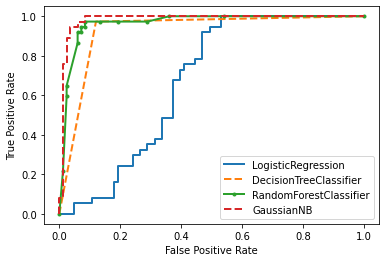

In [ ]:
als = {
  #'알고리즘명':( '선의모양', 알고리즘객체 )    
  'LogisticRegression'    :( '-',  LogisticRegression() ),
  'DecisionTreeClassifier':( '--', DecisionTreeClassifier(max_depth=5) ),
  'RandomForestClassifier':( '.-', RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10) ),
  'GaussianNB'            :( '--', GaussianNB() ),
  #'SVC'                   :( '-',  SVC() ),
}
for name, ( lineStyle, model ) in als.items(): 
  # 학습
  model.fit( train_X, train_y )
  # 예측
  pred   = model.predict_proba( test_X ) 
  # 예측결과를 타입 변환, 특정값 선택
  pred_s = pd.Series( pred[ : , 1] )
  # 평가 지표 획득
  # 거짓긍정비율, 참긍정비율, 
  # _는 통상적으로 값을 받아는 주는데, 사용하지 않을 경우(자리만차지함)
  # 관습적으로 사용하는 표현이다
  fpr, tpr, _ = roc_curve( test_y, pred_s )
  # x축을 fpr, y축을 tpr 기준으로 그리면 roc 차트가 완성된다
  plt.plot( fpr, tpr, lineStyle, linewidth=2, label=name )
  #break
  # 실제수치를 대비해서 비교하는게 힘들다
  print( name, auc( fpr, tpr ) )

# 범례노출
plt.legend()
# 축의 이름
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
# auc 수치 비교 결과 GaussianNB 가장 높은 점수를 받았다
# GaussianNB 최우선 알고리즘으로 선정하여서 최적화 작업 진행하고,
# n배수 이상 후보군을 잡는다면 하위 n개까지 선정해서 최적화 진행

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
als = {
  'LogisticRegression'    :( '-',  LogisticRegression() ),
  'DecisionTreeClassifier':( '--', DecisionTreeClassifier(max_depth=5) ),
  'RandomForestClassifier':( '.-', RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10) ),
  'GaussianNB'            :( '--', GaussianNB() ),  
}
top_level_acc  = 0
top_level_name = None
for name, ( lineStyle, model ) in als.items():   
  model.fit( train_X, train_y )
  pred_y = model.predict( test_X )
  # 정확도가 가장 높은 알고리즘 및 수치값들만, 출력하시오
  cur_acc = accuracy_score( test_y, pred_y )
  # top_level_acc가 cur_acc(새로운 알고리즘) 낮으면 갱신된다
  if cur_acc > top_level_acc :
    top_level_acc  = cur_acc
    top_level_name = [ name, classification_report( test_y, pred_y ) ]

print( '최대 정확도', top_level_acc, top_level_name[0] ) 
print( top_level_name[1] )
    
    #print( name )
    #print( '정확도', accuracy_score( test_y, pred_y ) )
    #print( '분류 레포트\n', classification_report( test_y, pred_y ))
    #break
    #print( '-'*50 )

최대 정확도 0.95 RandomForestClassifier
              precision    recall  f1-score   support

       False       0.96      0.96      0.96        83
        True       0.92      0.92      0.92        37

    accuracy                           0.95       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.95      0.95      0.95       120



### 최적화(하이퍼파라미터튜닝, 교차검증, 파이프라인 구축)

### 모델 덤프(덤프파일, 정답파일, 사용함수(모듈))

# 시스템 통합(생략)

# 새 섹션